# Brief Report on experiment results. 

__Master Thesis Topic Name:__"Assessment of Mean Teacher and Prominent Adversarial Unlabeled Data for Language Classification"

__Result Envrionment Description:__  Google Colab GPU 

__Train/Test Dataset:__ 
1. For Fake news Dataset : 6090/2040  , Average lengths of article - 25.54.
2. For IMDB Dataset: 6050/ 2000 , Average Length of article - 127.48, 

__Insight about dataset:__
1. IMDB dataset has compartively higher number of correct words, and higher text length too . However, Fake news dataset is collection of tweets so have incorrect spellings(hashtags), lower vocablury size, and text length.

Note: <p style="color:red">Due to time limitation, Taking 1000 sample at a time and attacking models using 4 attack recipes.</p><br>
__Models:__
1. __BERT__ (Bidirectional Encoder Representations from Transformers)
2. __Mean Teacher BERT__ (MT BERT- Proposed model)
3. __DistilBERT__- It is lighter version of BERT model which has comparatively very less parameter, low memory requirement, and suitable if we have less computational power. However, we have to trade off with slight (1-2 %) lower in accuracy than BERT model. 
4. __Mean Teacher BERT__ (DistilBERT- Proposed Model)

__Attack Recipes:__ 
1. __TextFoolerJin2019__ - Is BERT Really Robust? A Strong Baseline for Natural Language Attack on Text Classification and Entailment.
2. __TextBugger__ -Generating Adversarial Text Against Real-world Applications.
3. __PWWSRen 2019__ - Generating Natural Language Adversarial Examples through Probability Weighted Word Saliency.
4. __BAEGarg2019__ -BAE (BAE: BERT-Based Adversarial Examples)

__Metrics:__
1. __Original Accuracy(%)__ 
2. __Accuracy Under Attack(%)__ : Accuracy shown by model under attack. (More is good, less is bad : For model)
3. __Attack Success Rate(%)__: Accuracy of attack recipes in attacking the models.  (No. of successfull attack/ total attacks)
4. __Average Perturbation(%)__: Average Number of words needs to change in order to get successfull attack. (Lower is better, Higher is bad : For model) 
5. __Average words per input__: Average number of words per input . 
6. __Average Number of queries__ : Average number of queries require to successfully attack the mode.(Higher is better, and lower is bad : For model)

<span style="font-size:larger;">__Hypothesis:__</span>

 Proposed Model (MT BERT and MT DistilBERT):
 1. Shows better accuracy when not in under attack (Even Original accuracy is higher than baseline model, no compromise with original accuracy), and 
 2. Shows better robustness than baseline models(BERT/DistilBERT) under attack by mentioned attack recipes and in terms of above mentioned metrics.
 
 
__In orther words:__

 
 __MT BERT and MT DistilBERT should have:__
 1. Higher Original Accuracy than baseline model.
 2. Higher Accuracy under Attack than baseline models.
 3. Lower Success Rate than baseline model. 
 4. Higher Perturbation rate than baseline models.
 5. Higher Average Number of queries required to get attacked than baseline models. 
 

In [1]:
# required for google colab
!pip install plotly==5.4.0
#
!pip install -U kaleido # for static image generation 

In [2]:
import os 
os.chdir('/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/Master Thesis/Mean-Teacher-BERT-Robustness-Assessment')
# os.chdir('/content/drive/MyDrive/Master Thesis/Mean-Teacher-BERT-Robustness-Assessment')

### Reading Dataset


In [3]:
import pandas as pd 
from IPython.display import HTML, display
pd.options.display.float_format = "{:,.2f}".format
import plotly.express as px
from plotly.subplots import make_subplots
import os
import matplotlib.pyplot as plt
import seaborn as sns

#image showing location
img_loc='/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/Master Thesis/MasterThesisReport/img/'
# img_loc='/content/drive/MyDrive/Master Thesis/Mean-Teacher-BERT-Robustness-Assessment/Result/image'

# link to fake news codalab dataset, saving my experiment result in  here
fakenews_link= 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTa7adpGv5lAg1gJD6lvUhhXdibgWpimrX8Lu7Ht-_nsKXCVd4gAyNA2krNE6dEtNEtc067FF9jxdR7/pub?gid=923968876&single=true&output=csv'

# link to imdb sentiment analysis review 
imdb_link= 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTa7adpGv5lAg1gJD6lvUhhXdibgWpimrX8Lu7Ht-_nsKXCVd4gAyNA2krNE6dEtNEtc067FF9jxdR7/pub?gid=235103714&single=true&output=csv'

# for custom sortings
custom_dict = {'BERT': 0, 'MTBERT': 1, 'DistilBERT': 3, 'MTDistilBERT':4} 

In [4]:
#reading fakenews data codalab 
df_fakenews= pd.read_csv(fakenews_link,
                          usecols=['Model',
                          'Attack_Recipe',
                          'Total_examples',
                          'Original_Accuracy_%',
                          'Accuracy_Under_Attack_%',
                          'Attack_success_rate_%',
                          'Average_perturbed_word_%',
                          'Avg_num_queries']).round(2).reset_index(drop=True)
# df_fakenews=df_fakenews[df_fakenews.Total_examples==2000].reset_index(drop=True)

#reading IMDB sentiment analysis dataset
df_imdb= pd.read_csv(imdb_link,
                          usecols=['Model',
                          'Attack_Recipe',
                          'Total_examples',
                          'Original_Accuracy_%',
                          'Accuracy_Under_Attack_%',
                          'Attack_success_rate_%',
                          'Average_perturbed_word_%',
                          'Avg_num_queries']).round(2).reset_index(drop=True)
# data looks like  
df_imdb.head()

Model Attack_Recipe  Total_examples  Original_Accuracy_%  \
0           BERT    TextFooler            1000                93.60   
1        MT BERT    TextFooler            1000                94.30   
2     DistilBERT    TextFooler            1000                92.40   
3  MT DistilBERT    TextFooler            1000                93.20   
4           BERT    TextBugger            1000                93.60   

   Accuracy_Under_Attack_%  Attack_success_rate_%  Average_perturbed_word_%  \
0                     0.10                  99.89                      4.99   
1                    31.00                  67.13                      8.19   
2                     0.20                  99.78                      5.14   
3                    23.50                  74.79                      8.07   
4                     2.20                  97.65                     22.06   

   Avg_num_queries  
0           272.91  
1           727.81  
2           280.83  
3           672.94  
4           234.50

In [5]:
df_temp=df_imdb.groupby(['Attack_Recipe','Model']).mean()

x=df_temp[set(df_temp.columns).difference(['Total_examples'])][['Original_Accuracy_%','Accuracy_Under_Attack_%','Attack_success_rate_%','Average_perturbed_word_%','Avg_num_queries']]
print(x.to_latex())

\begin{tabular}{llrrrrr}
\toprule
           &               &  Original\_Accuracy\_\% &  Accuracy\_Under\_Attack\_\% &  Attack\_success\_rate\_\% &  Average\_perturbed\_word\_\% &  Avg\_num\_queries \\
Attack\_Recipe & Model &                      &                          &                        &                           &                  \\
\midrule
BAE & BERT &                93.67 &                    33.93 &                  63.77 &                      3.78 &           242.24 \\
           & DistilBERT &                92.85 &                    33.55 &                  63.87 &                      3.57 &           238.49 \\
           & MT BERT &                94.13 &                    56.45 &                  40.03 &                      3.55 &           198.26 \\
           & MT DistilBERT &                93.17 &                    53.60 &                  42.47 &                      3.35 &           284.94 \\
PWWS & BERT &                93.67 &                     

In [6]:
df_temp=df_fakenews.groupby(['Attack_Recipe','Model']).mean()

x=df_temp[set(df_temp.columns).difference(['Total_examples'])][['Original_Accuracy_%','Accuracy_Under_Attack_%','Attack_success_rate_%','Average_perturbed_word_%','Avg_num_queries']]
print(x.to_latex())

\begin{tabular}{llrrrrr}
\toprule
           &               &  Original\_Accuracy\_\% &  Accuracy\_Under\_Attack\_\% &  Attack\_success\_rate\_\% &  Average\_perturbed\_word\_\% &  Avg\_num\_queries \\
Attack\_Recipe & Model &                      &                          &                        &                           &                  \\
\midrule
BAE & BERT &                94.17 &                    67.53 &                  28.30 &                     20.30 &            82.10 \\
           & DistilBERT &                94.41 &                    67.66 &                  28.34 &                     18.99 &            79.12 \\
           & MT BERT &                95.64 &                    77.62 &                  18.83 &                     16.57 &            88.64 \\
           & MT DistilBERT &                95.29 &                    74.04 &                  22.30 &                     19.46 &            86.47 \\
PWWS & BERT &                94.17 &                    2

In [7]:
df_fakenews['Model']=='MT BERT'

0     False
1      True
2     False
3     False
4     False
      ...  
59    False
60    False
61     True
62    False
63    False
Name: Model, Length: 64, dtype: bool

In [8]:
df_fakenews.groupby(['Attack_Recipe','Model']).mean()

Total_examples  Original_Accuracy_%  \
Attack_Recipe Model                                                
BAE           BERT                 1,125.00                94.17   
              DistilBERT           1,125.00                94.41   
              MT BERT              1,125.00                95.64   
              MT DistilBERT        1,125.00                95.29   
PWWS          BERT                 1,125.00                94.17   
              DistilBERT           1,125.00                94.41   
              MT BERT              1,125.00                95.64   
              MT DistilBERT        1,125.00                95.29   
TextBugger    BERT                 1,125.00                94.17   
              DistilBERT           1,125.00                94.41   
              MT BERT              1,125.00                95.64   
              MT DistilBERT        1,125.00                95.29   
TextFooler    BERT                 1,125.00                94.17   
              DistilBERT           1,125.00                94.41   
              MT BERT              1,125.00                95.64   
              MT DistilBERT        1,125.00                95.29   

                             Accuracy_Under_Attack_%  Attack_success_rate_%  \
Attack_Recipe Model                                                           
BAE           BERT                             67.53                  28.30   
              DistilBERT                       67.66                  28.34   
              MT BERT                          77.62                  18.83   
              MT DistilBERT                    74.04                  22.30   
PWWS          BERT                             24.68                  73.80   
              DistilBERT                       25.68                  72.80   
              MT BERT                          59.16                  38.14   
              MT DistilBERT                    48.75                  48.84   
TextBugger    BERT                             30.66                  66.69   
              DistilBERT                       25.36                  73.14   
              MT BERT                          65.61                  31.39   
              MT DistilBERT                    53.99                  43.34   
TextFooler    BERT                              7.62                  91.90   
              DistilBERT                        7.58                  91.98   
              MT BERT                          54.05                  43.48   
              MT DistilBERT                    40.90                  57.06   

                             Average_perturbed_word_%  Avg_num_queries  
Attack_Recipe Model                                                     
BAE           BERT                              20.30            82.10  
              DistilBERT                        18.99            79.12  
              MT BERT                           16.57            88.64  
              MT DistilBERT                     19.46            86.47  
PWWS          BERT                              20.16           215.04  
              DistilBERT                        19.18           210.62  
              MT BERT                           17.93           236.90  
              MT DistilBERT                     18.66           227.98  
TextBugger    BERT                              24.87            82.55  
              DistilBERT                        22.21            76.57  
              MT BERT                           23.29           114.25  
              MT DistilBERT                     24.54            96.14  
TextFooler    BERT                              22.48           180.55  
              DistilBERT                        21.37           164.40  
              MT BERT                           21.25           282.66  
              MT DistilBERT                     24.19           211.85

# Accuracy 

__Finding Out:__
> __Is Original Accuracy of proposed model is higher than baseline models considering all attacks?__

> __How much drop in accuracy when under attack ?__

### Conclusion
1. __MT BERT has shown better original accuracy(approx- 1-2 % better) followed by MT DistilBERT in both the dataset.__
2. __MT BERT has shown approx 27-30 % improvement in accuracy under attack compared to BERT considering both dataset.__ 
3. __MT BERT has also shown lowest drop in accuracy.__


In [9]:
'''
In this Particur cell,
Averaging Original Accuracy and Accuracy Under Attack considering all attack recipes. 
Also, calulcating drops in accuracy 
i.e.
Original Accuracy - Accuracy Under Attack.
Lower drop in accuracy means better model.
'''
# FakeNewsDataset: taking mean of original accuracy as per model
df_acc_fkn= df_fakenews.groupby('Model')[['Original_Accuracy_%','Accuracy_Under_Attack_%']].mean()
# changin column name
df_acc_fkn.columns = ['Ori_Acc_Mean_%','Acc_und_Attk_Mean_%']
df_acc_fkn=df_acc_fkn.reset_index().round(2)
df_acc_fkn['Drops_in_Accuracy_%']=df_acc_fkn['Ori_Acc_Mean_%']-df_acc_fkn['Acc_und_Attk_Mean_%']
print('Fake News Dataset')
display(df_acc_fkn)


# IMDB Dataset: taking mean of original accuracy as per model
df_acc_imdb= df_imdb.groupby('Model')[['Original_Accuracy_%','Accuracy_Under_Attack_%']].mean()
# changing column name
df_acc_imdb.columns = ['Ori_Acc_Mean_%','Acc_und_Attk_Mean_%']
df_acc_imdb=df_acc_imdb.reset_index().round(2)
df_acc_imdb['Drops_in_Accuracy_%']=df_acc_imdb['Ori_Acc_Mean_%']-df_acc_imdb['Acc_und_Attk_Mean_%']
print('\nIMDB Dataset')
display(df_acc_imdb)


Fake News Dataset


Model  Ori_Acc_Mean_%  Acc_und_Attk_Mean_%  Drops_in_Accuracy_%
0           BERT           94.18                32.62                61.56
1     DistilBERT           94.41                31.57                62.84
2        MT BERT           95.64                64.11                31.53
3  MT DistilBERT           95.29                54.42                40.87


IMDB Dataset


Model  Ori_Acc_Mean_%  Acc_und_Attk_Mean_%  Drops_in_Accuracy_%
0           BERT           93.67                 9.23                84.44
1     DistilBERT           92.85                10.47                82.38
2        MT BERT           94.13                36.43                57.70
3  MT DistilBERT           93.17                31.74                61.43

Fake News Dataset: Mean Original Accuracy and Accuracy under attack considering four attack recipes.


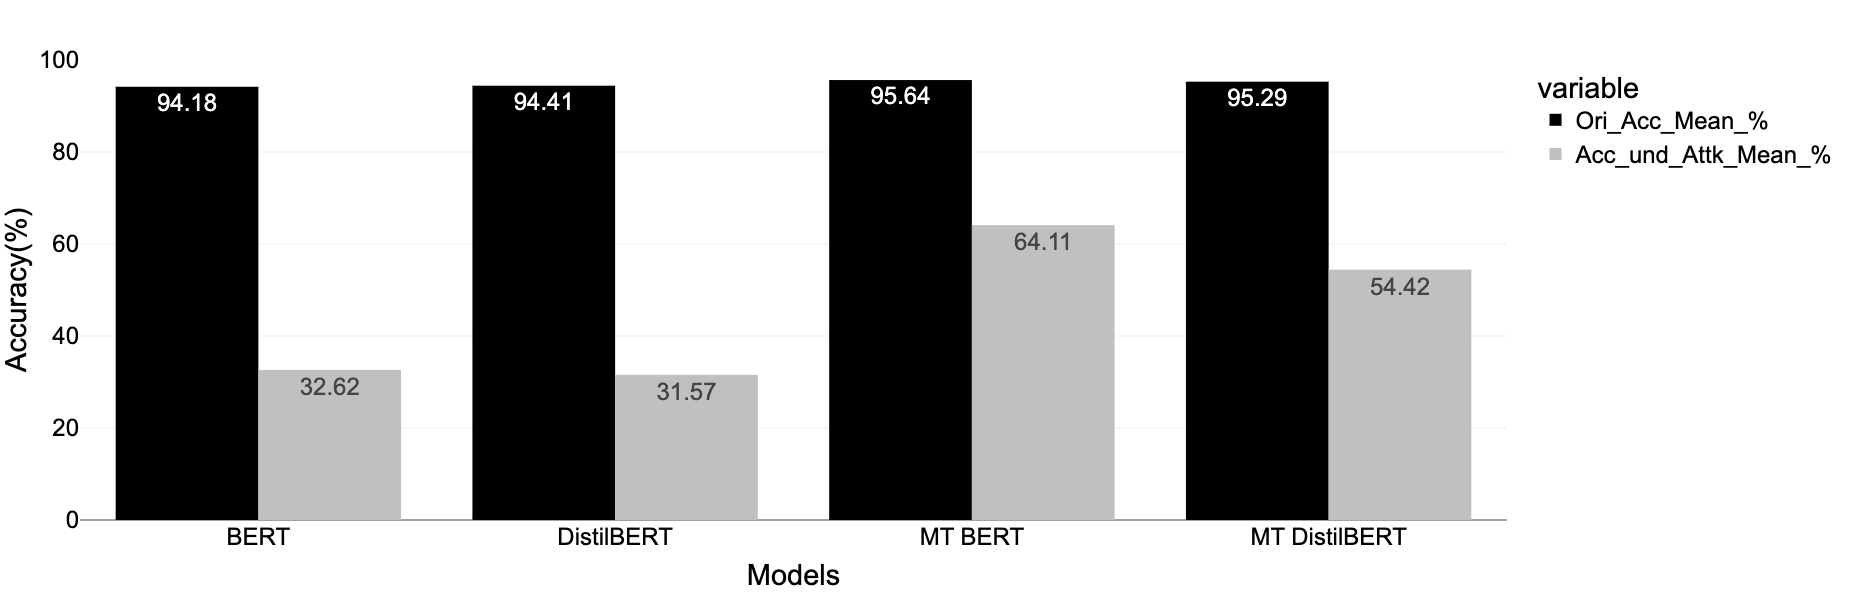



IMDB Dataset: Mean Original Accuracy and Accuracy under attack considering four attack recipes.


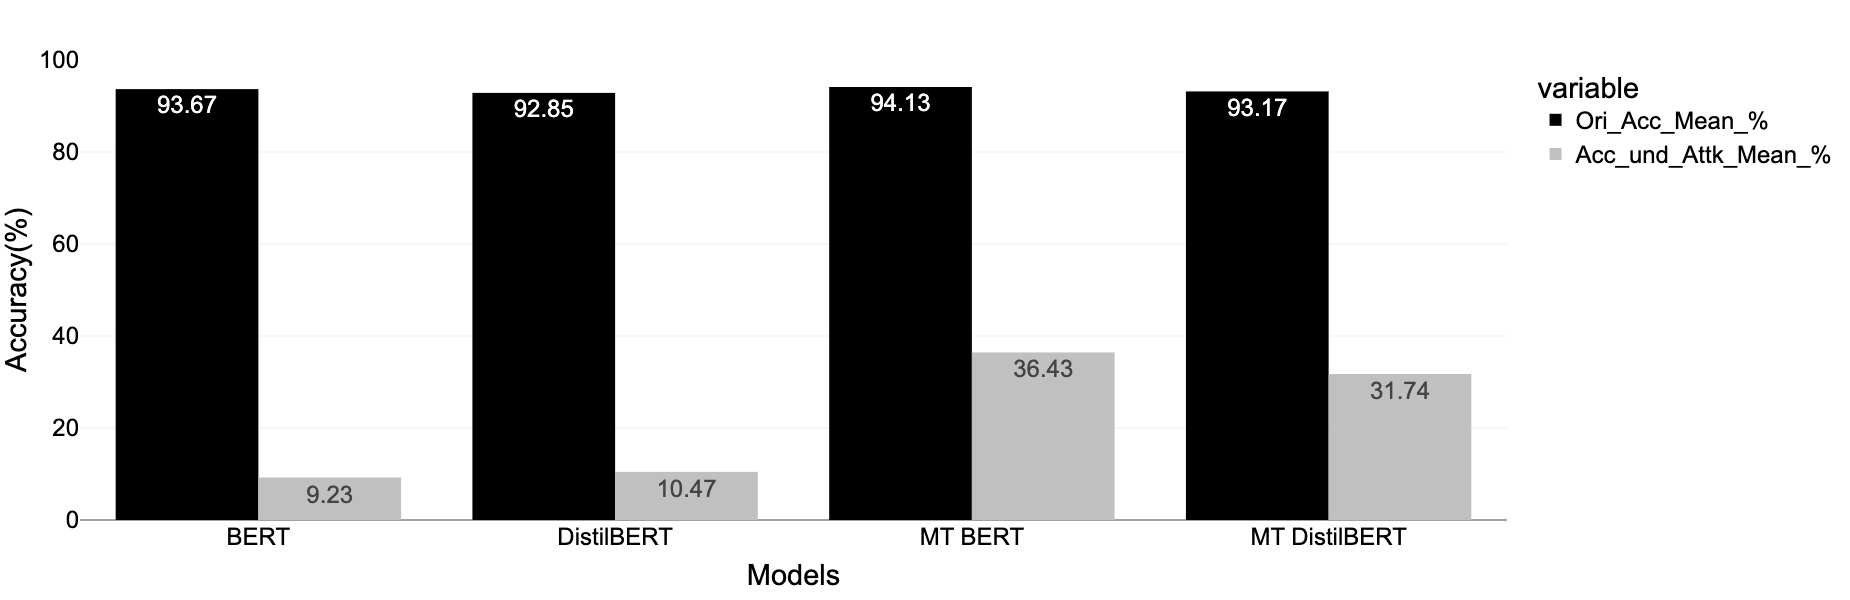

In [101]:
# Doing this to create subplots using plotly in express
df_acc_fkn['Dataset']='FakeNews'
df_acc_imdb['Dataset']='IMDB'
df_imdb_fake_acc= df_acc_imdb.append(df_acc_fkn)


# Highting maximum original accuracy, Minimum Accuracy under attack and Drop in accuracy.
print('Fake News Dataset: Mean Original Accuracy and Accuracy under attack considering four attack recipes.')
display(df_acc_fkn.style.highlight_max(subset=['Ori_Acc_Mean_%','Acc_und_Attk_Mean_%'],color='lightgreen')\
                                .highlight_min(subset=['Drops_in_Accuracy_%'],color='lightgreen')\
                                .highlight_min(subset=['Ori_Acc_Mean_%','Acc_und_Attk_Mean_%'],color='pink')\
                                .highlight_max(subset=['Drops_in_Accuracy_%'],color='pink'))
# Plotting
fig = px.bar(df_acc_fkn, x='Model', y=['Ori_Acc_Mean_%','Acc_und_Attk_Mean_%'],
            range_y=[0,100],
            barmode='group',
            hover_data=['Drops_in_Accuracy_%'],
            labels={'Model':'Models','value':'Accuracy(%)'},
            text='value', 
            width=1600,
            height=600, 
            color_discrete_map={'Ori_Acc_Mean_%': 'black','Acc_und_Attk_Mean_%': 'silver'},
            template="presentation")
#template="presentation"
# fig.update_traces(marker=dict(color="grey", line_color="white", pattern_fillmode="replace"))
fig.update_layout(
    font=dict(
        family="Arial, monospace",
        size=24,
        color="Black"
    )
)
fig.write_image(img_loc+"MOAandAUA_fknews.png")
fig.show()
print('\n')                            
print('IMDB Dataset: Mean Original Accuracy and Accuracy under attack considering four attack recipes.')
display(df_acc_imdb.style.highlight_max(subset=['Ori_Acc_Mean_%','Acc_und_Attk_Mean_%'],color='lightgreen')\
                                .highlight_min(subset=['Drops_in_Accuracy_%'],color='lightgreen')\
                                .highlight_min(subset=['Ori_Acc_Mean_%','Acc_und_Attk_Mean_%'],color='pink')\
                                .highlight_max(subset=['Drops_in_Accuracy_%'],color='pink'))
# Plotting
fig = px.bar(df_acc_imdb, x='Model', y=['Ori_Acc_Mean_%','Acc_und_Attk_Mean_%'],
            range_y=[0,100],
            barmode='group',
            hover_data=['Drops_in_Accuracy_%'],
            labels={'Model':'Models','value':'Accuracy(%)'},
            text='value', 
            width=1600,
            height=600,
            template="presentation",
            color_discrete_map={'Ori_Acc_Mean_%': 'black','Acc_und_Attk_Mean_%': 'silver'})
fig.update_traces(marker=dict(line_color="black", pattern_fillmode="replace")) 
# fig.update_traces(marker=dict(color="grey", line_color="white",pattern_fillmode="replace" ))
fig.update_layout(
    font=dict(
        family="Arial, monospace",
        size=24,
        color="Black"
    )
)
fig.write_image(img_loc+"MOAandAUA_Imdb.png")
fig.show()

In [11]:
# print(df_acc_fkn.style.highlight_max(subset=['Ori_Acc_Mean_%','Acc_und_Attk_Mean_%'],color='lightgreen')\
#                                 .highlight_min(subset=['Drops_in_Accuracy_%'],color='lightgreen')\
#                                 .highlight_min(subset=['Ori_Acc_Mean_%','Acc_und_Attk_Mean_%'],color='pink')\
#                                 .highlight_max(subset=['Drops_in_Accuracy_%'],color='pink').to_latex())

# Evaluation of models with respect to Attack Recipes.
Exploring the performance of models with respect to individual attack recipes.
### Conclusion based on all attack recipes:
1. __Proposed model has outperformed their respective baseline models in all attack recipes.__
2. __Overall, MT BERT has outperformed all model followed by MTDistilBERT model.__


## PWWS

In [12]:
#Fake News dataset
print('\n \t \t FAKE NEWS Dataset')

# Highlighting maximum values and minimum values. 
pwws=df_fakenews[df_fakenews['Attack_Recipe']=='PWWS'].groupby('Model').mean().sort_values('Accuracy_Under_Attack_%',ascending= False)
display(pwws.style.highlight_max(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='lightgreen')\
                        .highlight_min(subset=['Attack_success_rate_%'],color='lightgreen')\
                        .highlight_max(subset=['Attack_success_rate_%'],color='pink')\
                        .highlight_min(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='pink'))
#IMDB dataset
print('\n \t \t IMDB Dataset')
pwws_imdb=df_imdb[df_imdb['Attack_Recipe']=='PWWS'].groupby('Model').mean().sort_values('Accuracy_Under_Attack_%',ascending= False)
display(pwws_imdb.style.highlight_max(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='lightgreen')\
                            .highlight_min(subset=['Attack_success_rate_%'],color='lightgreen')\
                            .highlight_max(subset=['Attack_success_rate_%'],color='pink')\
                            .highlight_min(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='pink'))


 	 	 FAKE NEWS Dataset



 	 	 IMDB Dataset


## BAE

In [13]:

print('\n \t \t FAKE NEWS Dataset')
bae=df_fakenews[df_fakenews['Attack_Recipe']=='BAE'].groupby('Model').mean().sort_values('Accuracy_Under_Attack_%',ascending= False)
display(bae.style.highlight_max(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='lightgreen')\
                        .highlight_min(subset=['Attack_success_rate_%'],color='lightgreen')\
                        .highlight_max(subset=['Attack_success_rate_%'],color='pink')\
                        .highlight_min(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='pink'))

#IMDB dataset
print('\n \t \t IMDB Dataset')
bae_imdb=df_imdb[df_imdb['Attack_Recipe']=='BAE'].groupby('Model').mean().sort_values('Accuracy_Under_Attack_%',ascending= False)
display(bae_imdb.style.highlight_max(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='lightgreen')\
                            .highlight_min(subset=['Attack_success_rate_%'],color='lightgreen')\
                            .highlight_max(subset=['Attack_success_rate_%'],color='pink')\
                            .highlight_min(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='pink'))


 	 	 FAKE NEWS Dataset



 	 	 IMDB Dataset




## TextFooler

In [14]:
print('FAKE NEWS Dataset')
textfooler=df_fakenews[(df_fakenews['Attack_Recipe']=='TextFooler')].groupby('Model').mean().sort_values('Accuracy_Under_Attack_%',ascending= False)
display(textfooler.style.highlight_max(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='lightgreen')\
                                .highlight_min(subset=['Attack_success_rate_%'],color='lightgreen')\
                                .highlight_max(subset=['Attack_success_rate_%'],color='pink')\
                                .highlight_min(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='pink'))

#IMDB dataset
print('\n IMDB Dataset')
textfooler_imdb=df_imdb[(df_imdb['Attack_Recipe']=='TextFooler')].groupby('Model').mean().sort_values('Accuracy_Under_Attack_%',ascending= False)
display(textfooler_imdb.style.highlight_max(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='lightgreen')\
                                    .highlight_min(subset=['Attack_success_rate_%'],color='lightgreen')\
                                    .highlight_max(subset=['Attack_success_rate_%'],color='pink')\
                                    .highlight_min(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='pink'))



FAKE NEWS Dataset



 IMDB Dataset


## Textbugger

In [15]:
print('FAKE NEWS Dataset')
textbugger=df_fakenews[(df_fakenews['Attack_Recipe']=='TextBugger')].groupby(['Model']).mean().sort_values('Accuracy_Under_Attack_%',ascending= False)
display(textbugger.style.highlight_max(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='lightgreen')\
                                .highlight_min(subset=['Attack_success_rate_%'],color='lightgreen')\
                                .highlight_max(subset=['Attack_success_rate_%'],color='pink')\
                                .highlight_min(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='pink'))

print('\n IMDB Dataset')
textbugger_imdb=df_imdb[(df_imdb['Attack_Recipe']=='TextBugger')].groupby(['Model']).mean().sort_values('Accuracy_Under_Attack_%',ascending= False)
display(textbugger_imdb.style.highlight_max(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='lightgreen')\
                                    .highlight_min(subset=['Attack_success_rate_%'],color='lightgreen')\
                                    .highlight_max(subset=['Attack_success_rate_%'],color='pink')\
                                    .highlight_min(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%', 'Average_perturbed_word_%','Avg_num_queries'],color='pink'))


FAKE NEWS Dataset



 IMDB Dataset


# Evaluation of model with respect to metrics.

### Conlcusion for Number of Queries :
1. Overall MT BERT model require higher number of queries for attacking except BAE attack Recipes. And, in case TextFooler, the difference in between MT bert and BERT is quite higher and doubled in case of IMDB dataset.
2. Overall BAE attack recipe require lower number of queries for attack. However, attack performance is quite lower.
3. PWWS require high number of queries to attack followed by TextFooler. 
4. Number of queries increases with the increase in length. And, for Textfooler and PWWS difference is quite higher. 

### Conclusion with respect to attack success rate:
1. Overall, MTBERT model has shown lowest attack success rate followed by MT DistilBERT. 
2. Attack success rate is higher in IMDB dataset in contrast to Fakenews dataset.

### Conclusion with respect to average perturbed word:
1. In IMDB dataset, MTBERT model has shown highest perturbation requirement followed by MT DistilBERT. But, In case of Fake news Dataset, BERT model has shown highest perturbation followed by MT DistilBERT.  
2. The difference in perturbation in both dataset is higher, and IMDB dataaset has shown highest words perturbation in contrast of Fake news dataset. Except, TextBugger which has shown almost same perturbation rate.
3. TextBugger require higher number of perturbation of words followed by TextFooler. On the other end, BAE required lowest number of perturbation followed by PWWS.

In [16]:
### Fake news Dataset

# if you want to consider only best models 
# df_fakenews_best_baseline= df_fakenews[(df_fakenews.Model=='MT BERT')| (df_fakenews.Model=='BERT')].groupby(['Attack_Recipe','Model']).mean().reset_index()
# df_fakenews_best_baseline['Dataset']='FakeNews'

df_fakenews_best_baseline= df_fakenews.groupby(['Attack_Recipe','Model']).mean().reset_index()
df_fakenews_best_baseline['Dataset']='Covid-19 Fake Tweets'

### IMDB dataset
df_imdb_best_baseline= df_imdb.groupby(['Attack_Recipe','Model']).mean().reset_index()
df_imdb_best_baseline['Dataset']='IMDB'


In [17]:
# for subplotting 
df_imdb_fake_best_baseline= df_imdb_best_baseline.append(df_fakenews_best_baseline)
df_imdb_fake_best_baseline.head()


Attack_Recipe          Model  Total_examples  Original_Accuracy_%  \
0           BAE           BERT        1,333.33                93.67   
1           BAE     DistilBERT        1,333.33                92.85   
2           BAE        MT BERT        1,333.33                94.13   
3           BAE  MT DistilBERT        1,333.33                93.17   
4          PWWS           BERT        1,333.33                93.67   

   Accuracy_Under_Attack_%  Attack_success_rate_%  Average_perturbed_word_%  \
0                    33.93                  63.77                      3.78   
1                    33.55                  63.87                      3.57   
2                    56.45                  40.03                      3.55   
3                    53.60                  42.47                      3.35   
4                     0.60                  99.36                      3.97   

   Avg_num_queries Dataset  
0           242.24    IMDB  
1           238.49    IMDB  
2           198.26    IMDB  
3           284.94    IMDB  
4           749.33    IMDB


## Number of Queries
__Finding Out__:
> __Affect of dataset on metrics. Like does Larger average length dataet requires more queries to attack?__

>__Comparision of metrics of different attack recipes with different dataset.__

### Conlcusion for Number of Queries :
1. Overall MT BERT model require higher number of queries for attacking except BAE attack Recipes. And, in case TextFooler, the difference in between MT bert and BERT is quite higher and doubled in case of IMDB dataset.
2. Overall BAE attack recipe require lower number of queries for attack. However, attack performance is quite lower.
3. PWWS require high number of queries to attack followed by TextFooler. 
4. Number of queries increases with the increase in length. And, for Textfooler and PWWS difference is quite higher. 

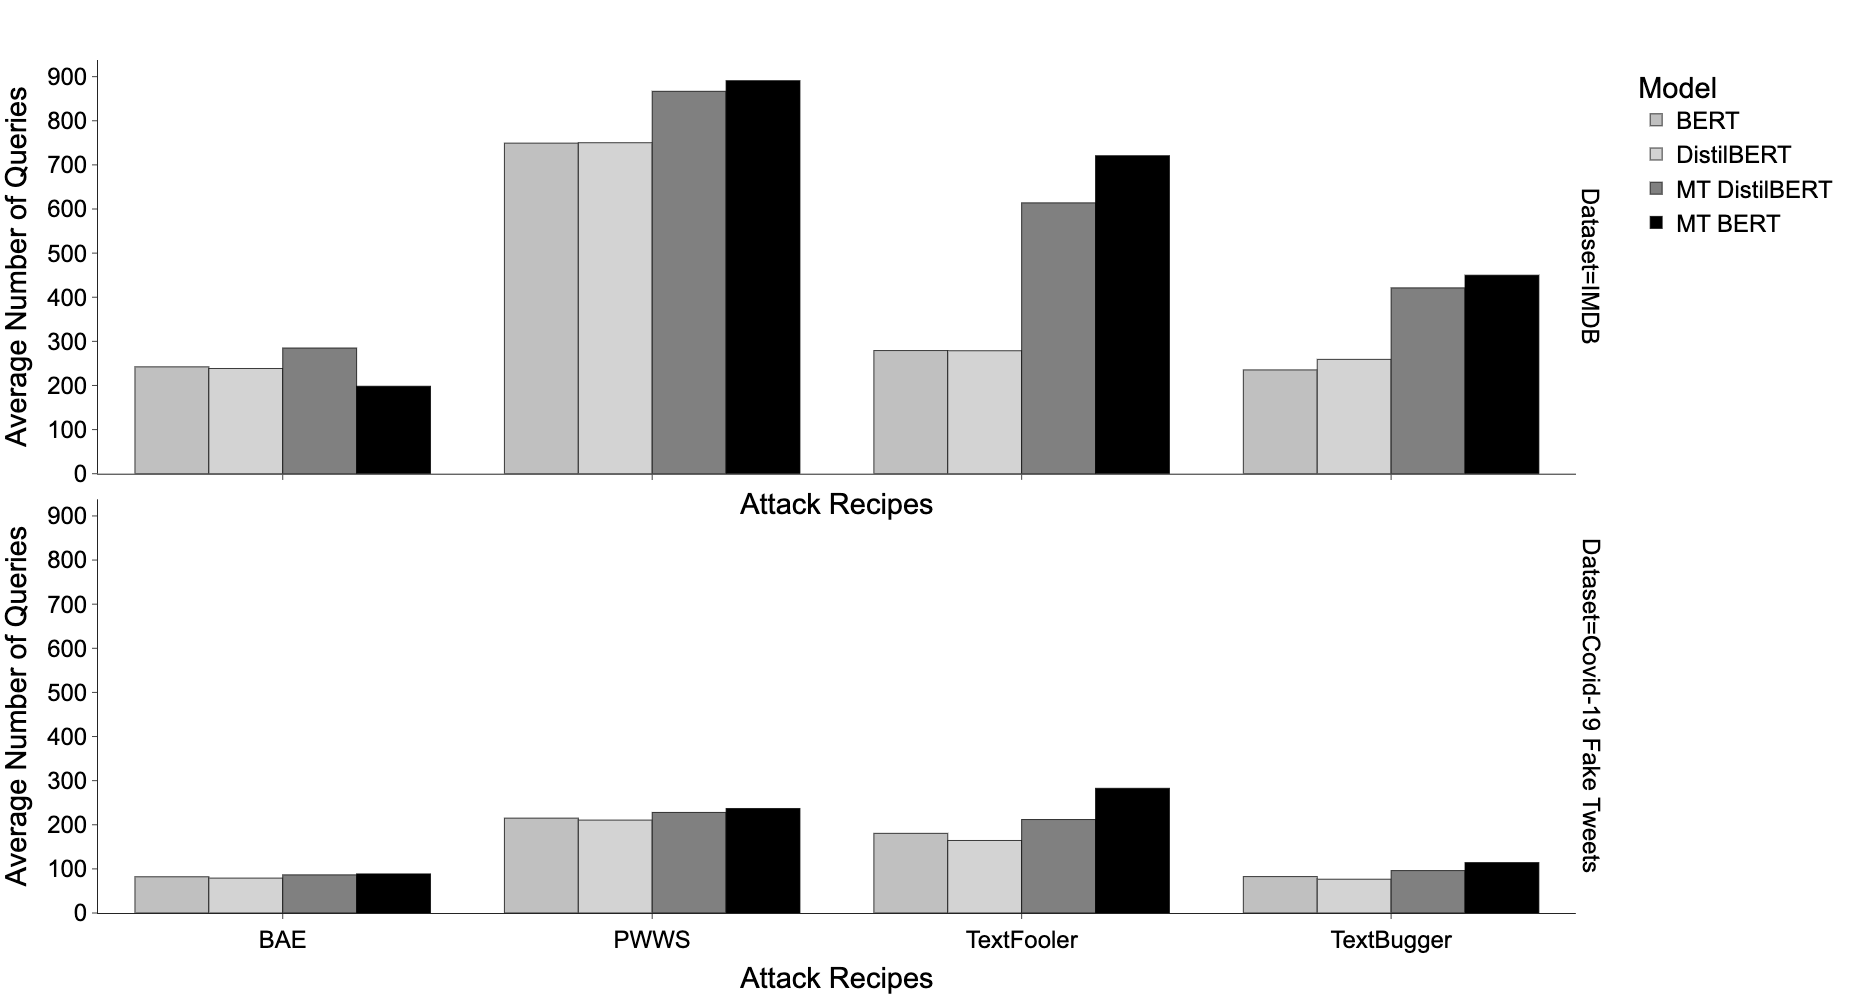

In [78]:
custom_dict_1 = {'BERT': 0, 'DistilBERT': 1, 'MT DistilBERT': 3, 'MT BERT': 4} 
color_dict = {'BERT': 'silver', 'DistilBERT': 'lightgrey', 'MT DistilBERT': 'grey', 'MT BERT': 'black'} 
# fig= px.histogram(df_imdb_fake_best_baseline.sort_values('Model', key= lambda x: x.map(custom_dict_1)),\
#     x='Dataset',
#     y='Avg_num_queries',
#     color='Model',
#     barmode='group',
#     facet_col='Attack_Recipe',
#     width=1500,
#     height=500,
#     labels={'Avg_num_queries':'Average Number of Queries'},
#     title='Average number of queries required for different models by attack recipes in different dataset',
#     color_discrete_map=color_dict,template='simple_white')
# fig.update_traces(marker=dict(line_color="black", pattern_fillmode="replace")) 
# fig.write_image(img_loc+"AvgNQuebyAttackRecipes.png")
# fig.show()

fig= px.histogram(df_imdb_fake_best_baseline.sort_values('Model', key= lambda x: x.map(custom_dict_1)),\
    x='Attack_Recipe',
    y='Avg_num_queries',
    color='Model',
    barmode='group',
    width=1500,
    height=1000,
    facet_row='Dataset',
    labels={'Avg_num_queries':'Average Number of Queries','Attack_Recipe':' Attack Recipes'},
#     title='Average number of queries required for different models as per attack recipes and dataset',
    color_discrete_map=color_dict,template='simple_white')
fig.update_xaxes(title_text='Attack Recipes')
fig.update_yaxes(title_text='Average Number of Queries')
fig.update_traces(marker=dict(line_color="black", pattern_fillmode="replace")) 
fig.update_layout(
    font=dict(
        family="Arial, monospace",
        size=24,
        color="Black"
    )
)
fig.write_image(img_loc+"AvgNQuebyDataset.png")


fig.show()



## Attack Success Rate

### Conclusion with respect to attack success rate:
1. Overall, MTBERT model has shown lowest attack success rate followed by MT DistilBERT. 
2. Attack success rate is higher in IMDB dataset in contrast to Fakenews dataset.


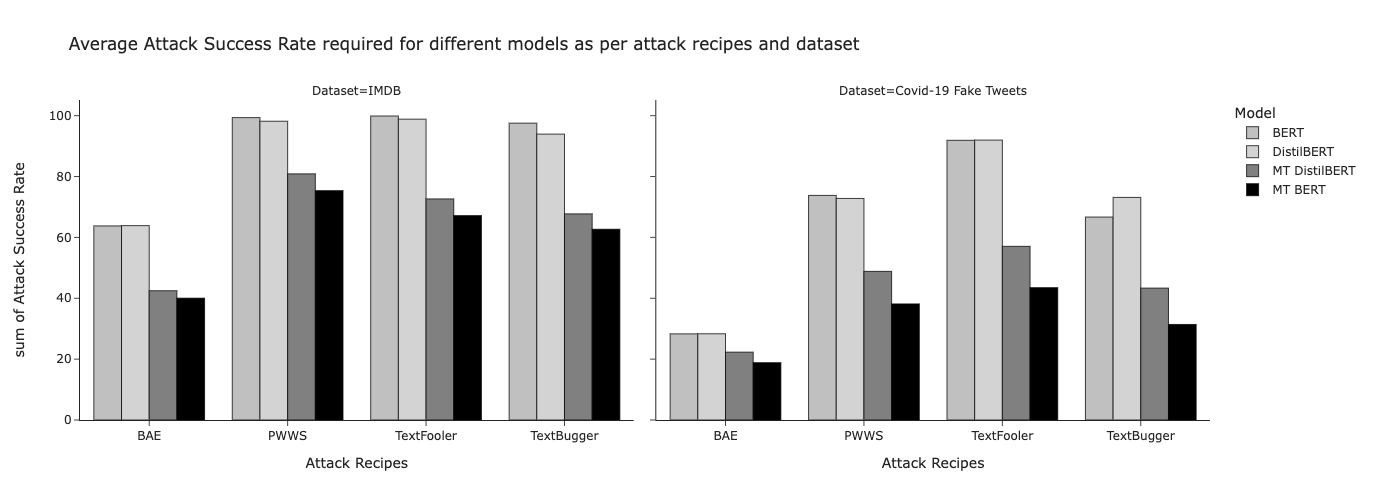

In [19]:
custom_dict_1 = {'BERT': 0, 'DistilBERT': 1, 'MT DistilBERT': 3, 'MT BERT': 4} 
# fig= px.histogram(df_imdb_fake_best_baseline.sort_values('Model', key= lambda x: x.map(custom_dict_1)),\
#     x='Dataset',
#     y='Attack_success_rate_%',
#     color='Model',
#     barmode='group',
#     facet_col='Attack_Recipe',
#     width=1500,
#     height=500,
#     labels={'Attack_success_rate_%':'Attack Success Rate'},
#     title='Average Attack Success Rate required for different models by attack recipes in different dataset', 
#     color_discrete_map=color_dict,template='simple_white')
# fig.update_traces(marker=dict(line_color="black", pattern_fillmode="replace")) 
# fig.show()

fig= px.histogram(df_imdb_fake_best_baseline.sort_values('Model', key= lambda x: x.map(custom_dict_1)),\
    x='Attack_Recipe',
    y='Attack_success_rate_%',
    color='Model',
    barmode='group',
    width=1500,
    height=500,
    facet_col='Dataset',
    labels={'Attack_success_rate_%':'Attack Success Rate','Attack_Recipe':' Attack Recipes'},
    title='Average Attack Success Rate required for different models as per attack recipes and dataset', 
    color_discrete_map=color_dict,template='simple_white')
fig.update_traces(marker=dict(line_color="black", pattern_fillmode="replace"))                
fig.show()

## Average Perturbed Word
### Conclusion with respect to average perturbed word:
1. In IMDB dataset, MTBERT model has shown highest perturbation requirement followed by MT DistilBERT. But, In case of Fake news Dataset, BERT model has shown highest perturbation followed by MT DistilBERT.  
2. The difference in perturbation in both dataset is higher, and IMDB dataaset has shown highest words perturbation in contrast of Fake news dataset. Except, TextBugger which has shown almost same perturbation rate.
3. TextBugger require higher number of perturbation of words followed by TextFooler. On the other end, BAE required lowest number of perturbation followed by PWWS.

Length statistics of Fake news dataset:25.54
Length statistics of IMDB dataset:112.74


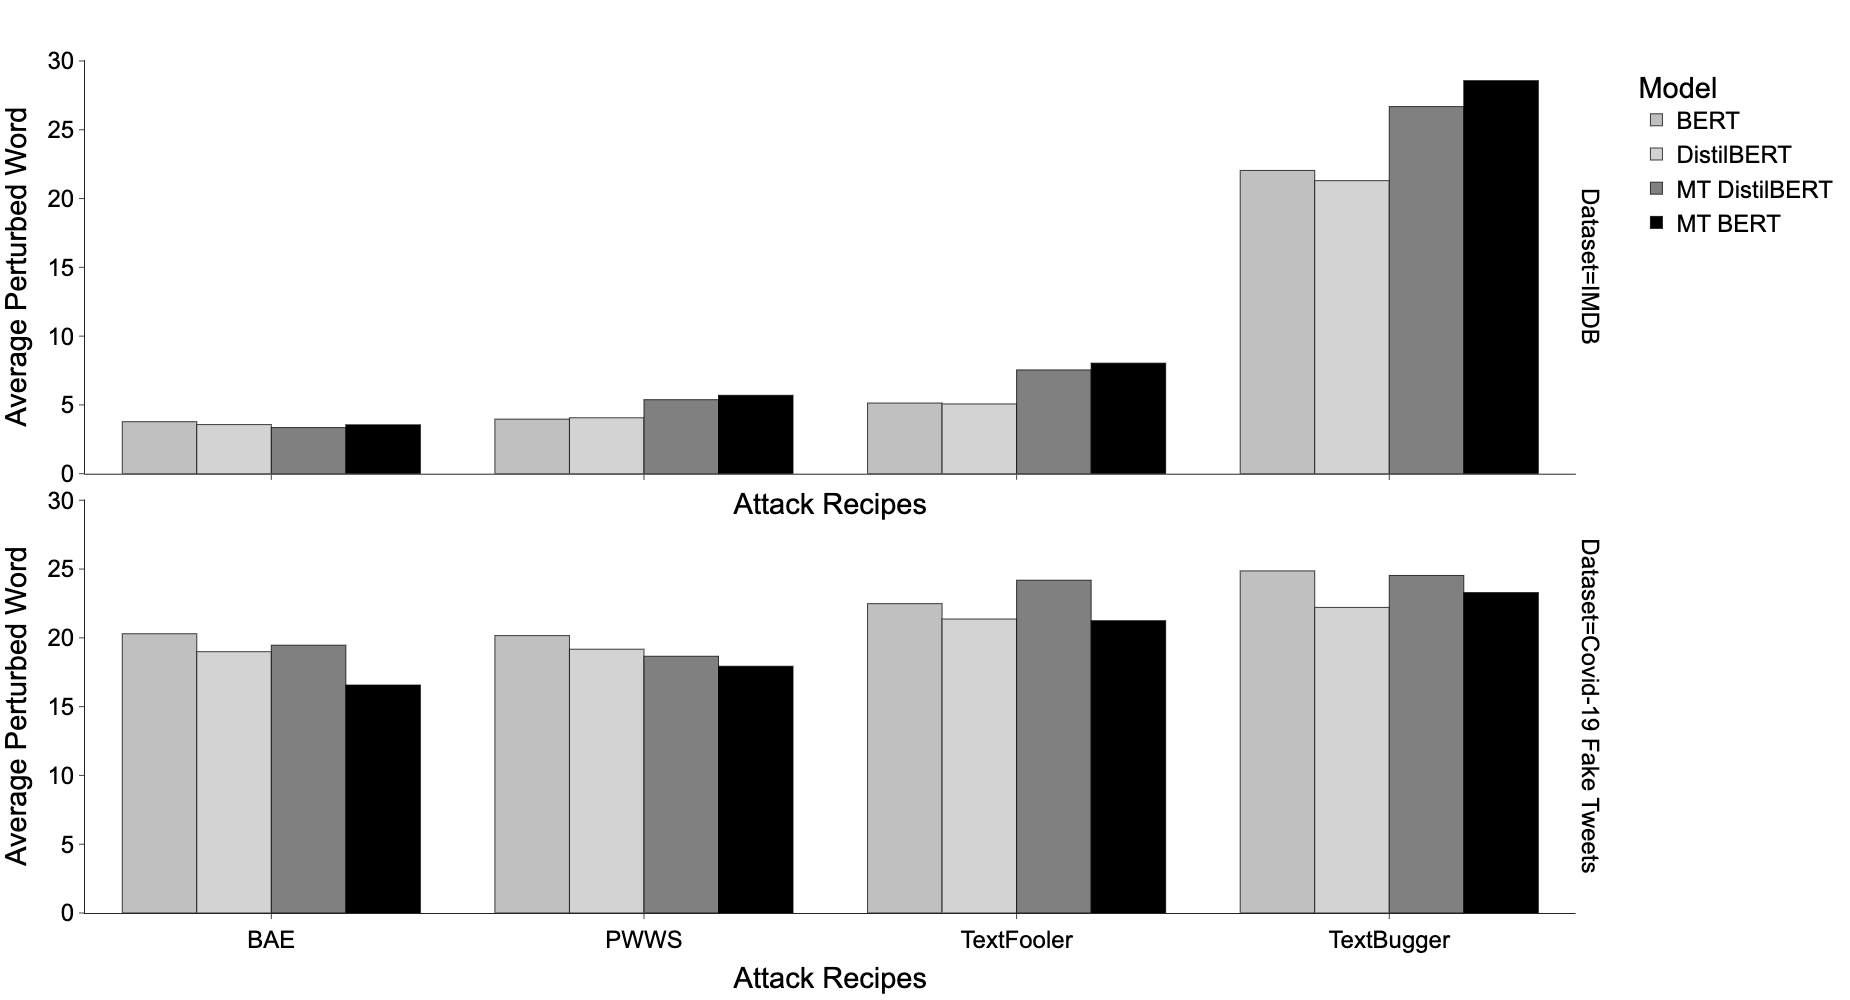

In [76]:
custom_dict_1 = {'BERT': 0, 'DistilBERT': 1, 'MT DistilBERT': 3, 'MT BERT': 4} 
print(f'Length statistics of Fake news dataset:{25.54}')
print(f'Length statistics of IMDB dataset:{112.74}')
# fig= px.histogram(df_imdb_fake_best_baseline.sort_values('Model', key= lambda x: x.map(custom_dict_1)),\
#     x='Dataset',
#     y='Average_perturbed_word_%',
#     color='Model',
#     barmode='group',
#     facet_col='Attack_Recipe',
#     width=1400,
#     height=500,
#     labels={'Average_perturbed_word_%':' Perturbed Word','Attack_success_rate_%':'Attack Success Rate','Attack_Recipe':' Attack Recipes'},
#     title='Average Perturbed Word required for different models by attack recipes in different dataset',
#     color_discrete_map=color_dict,template="simple_white")
# fig.update_traces(marker=dict(line_color="black", pattern_fillmode="replace"))                  
# fig.write_image(img_loc+"AvgPertByAttackRecipes.png")
# fig.show()

fig= px.histogram(df_imdb_fake_best_baseline.sort_values('Model', key= lambda x: x.map(custom_dict_1)),\
    x='Attack_Recipe',
    y='Average_perturbed_word_%',
    color='Model',
    barmode='group',
    width=1500,
    height=1000,
    facet_row='Dataset',
#     title='Average Perturbed Word(%) required for different models as per attack recipes and dataset',
    color_discrete_map=color_dict,template='simple_white')
fig.update_traces(marker=dict(line_color="black", pattern_fillmode="replace"))    
fig.update_xaxes(title_text='Attack Recipes')
fig.update_yaxes(title_text='Average Perturbed Word')
fig.update_layout(
    font=dict(
        family="Arial, monospace",
        size=24,
        color="Black"
    )
)
fig.write_image(img_loc+"AvgPertByDataset.png")
fig.show()

# Performance of attack recipes 
> __Which attack recipes has performed better than others(Top two)?__

Selected data of only best performing model i.e. MT BERT in order to find out best performing attack recipes overall considering
1. Accuracy under attack - Minimum(GOOD), Maximum(BAD) for attack recipe
2. Attack success rate - Minimum(BAD), Maximum(GOOD) for attack recipe
3. Average perturbation - Minimum(GOOD), Maximum(BAD) for attack recipe
4. Average num of queries - Minimum(GOOD), Maximum(BAD) for attack recipe

### Conclusion Attack Recipes:
1. Overall, MT BERT has shown highest robustness towards all attack recipes. However, especially highest in BAE attack recipes and lowest in PWWS and TextFooler(still higher than other models). 
2. Overall, PWWS and TextFooler are more successfull in attacking the models considering both dataset. Howevever, MT BERT has shown highest robustness compared to other mentioned models.

In [21]:
# fakenews dataset
print('Fake News Dataset')
df_fakenews_best_model= df_fakenews[df_fakenews.Model=='MT BERT']
df_fakenews_best_recipe=df_fakenews_best_model.groupby('Attack_Recipe').mean().reset_index()
display(df_fakenews_best_recipe.style.highlight_max(subset=['Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='pink')\
                                            .highlight_min(subset=['Attack_success_rate_%'],color='pink')\
                                            .highlight_max(subset=['Attack_success_rate_%'],color='lightgreen')\
                                            .highlight_min(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='lightgreen'))
print('IMDB Dataset')
df_imdb_best_model= df_imdb[df_imdb.Model=='MT BERT']
df_imdb_best_recipe=df_imdb_best_model.groupby('Attack_Recipe').mean().reset_index()
display(df_imdb_best_recipe.style.highlight_max(subset=['Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='pink')\
                                        .highlight_min(subset=['Attack_success_rate_%'],color='pink')\
                                        .highlight_max(subset=['Attack_success_rate_%'],color='lightgreen')\
                                        .highlight_min(subset=['Original_Accuracy_%','Accuracy_Under_Attack_%','Average_perturbed_word_%','Avg_num_queries'],color='lightgreen'))

Fake News Dataset


IMDB Dataset


# Exploratory analysis of the result logs

> __Whats the predicted probability distribution(perturbed_probability) of successful attack of models. By this we can also check robustness.__

> __Does attack recipes or model are specific to classes in data ?__ 


### Conclusion based on perturbation score(probability):
1. __For MT BERT model, the perturbation score(predicted probabilty) has range of 0.50-0.69 for IMDB dataset and 0.50-0.64 for fake news dataset.Mean value 0.53 for both the dataset. 75 % of the data is under 0.55.__

2. __On the other hand, for BERT model, 0.50-0.73 for both dataset with mean value 0.59. And, 75 % of the data is under 0.66.__

> Hence, MT BERT model not allowing attack recipes to manipulate the outcome with higher confidence. Or shown higher resilence towards attack.

### Conclusion based on number of queries:
1. __For MT BERT model, the number of queries has range of 24-2127, 15-708 and Mean number of queries 401 and 137 for IMDB and Fake news dataset respectively. 75 % of the data is under 596 and 179 respectively. On the other hand, for BERT model, 24-1772, 15-885 for for IMDB and Fake news Dataset with mean value 340 and 160 respectively. And, 75 % of the data is under 466 and 215 respectively.__

2. __TextFooler has shown some relation between number of queries and lenght of the text and same has been mentioned in their paper. Followed by PWWS.__

> MT BERT is require much higher number of queries to attack if the dataset length is higher. 

### Conclusion based on classes:
__For IMDB Dataset, the MT BERT model has shown more robustness for class 0. Even, training and testing  However, same behaviour is not observed in FakeNews Dataset.__

In [22]:
dataset_name=['IMDB','codalab']
attack_recipes=['TextFoolerJin2019', 'BAEGarg2019', 'TextBuggerLi2018', 'PWWSRen2019']

 Combining log files and creating as per dataset.

In [23]:
# joining the result reports 
for dataset in dataset_name:
    df= pd.DataFrame()
    for atk_rec in attack_recipes:
        file_list=os.listdir(f'Result/{dataset}/{atk_rec}')
        for f in file_list:
            df_temp= pd.read_csv(f'Result/{dataset}/{atk_rec}/{f}')
            df_temp['model']=f.split('_')[0]
            df_temp['attack_recipe']= atk_rec
            df= df.append(df_temp)
    df.to_csv(f'Result/{dataset}/{dataset}_complete.csv',index=False)

Reading logs
This dataset is log created by attack recipes.
So exploring attack logs.

In [24]:
# IMDB dataset 
df_result_imdb= pd.read_csv(f'Result/IMDB/IMDB_complete.csv').reset_index(drop=True)
# only taking model BERT and MT BERT 
# only taking attack recipe  
# df_result_imdb_sel= df_result_imdb[(df_result_imdb.model=='BERT')|(df_result_imdb.model=='MTBERT')].reset_index(drop=True) # if want to compare only best model
df_result_imdb_sel= df_result_imdb.reset_index(drop=True)
# df_result_imdb_sel=df_result_imdb_sel[(df_result_imdb_sel.attack_recipe=='TextFoolerJin2019')|(df_result_imdb_sel.attack_recipe=='PWWSRen2019')].reset_index(drop=True)
# len is count of words
df_result_imdb_sel['len']= df_result_imdb_sel.original_text.apply(lambda row : len(row.split(' ')))
df_result_imdb_sel.tail()

# Fake news dataset
df_result_fakenews= pd.read_csv(f'Result/codalab/codalab_complete.csv').reset_index(drop=True)
df_result_fakenews= df_result_fakenews.reset_index(drop=True)
# len is count of words
df_result_fakenews['len']= df_result_fakenews.original_text.apply(lambda row : len(row.split(' ')))

print('Logs file looks like this:')
df_result_fakenews.tail()


Logs file looks like this:


ground_truth_output  num_queries  original_output  original_score  \
107995                 0.00       381.00             0.00            0.39   
107996                 1.00     1,000.00             1.00            0.38   
107997                 1.00        47.00             1.00            0.41   
107998                 1.00        88.00             1.00            0.37   
107999                 0.00       453.00             0.00            0.36   

                                            original_text  perturbed_output  \
107995  indias [[calibrated]] [[testing]] [[strategy]]...              0.00   
107996  telangana is counted under high [[risk]] [[zon...              1.00   
107997  trump [[announces]] a [[cure]] for covid donal...              1.00   
107998  the [[world]] [[bank]] documented the existenc...              0.00   
107999  this [[case]] [[brings]] our [[total]] [[numbe...              1.00   

        perturbed_score                                     perturbed_text  \
107995             0.41  indias [[graduate]] [[screen]] [[scheme]] [[co...   
107996             0.43  telangana is counted under high [[jeopardy]] [...   
107997             0.42  trump [[foretell]] a [[heal]] for covid donald...   
107998             0.61  the [[global]] [[rely]] documented the existen...   
107999             0.52  this [[subject]] [[lend]] our [[tot]] [[numera...   

       result_type   model attack_recipe  len  
107995      Failed  MTBERT   PWWSRen2019   40  
107996      Failed  MTBERT   PWWSRen2019   70  
107997      Failed  MTBERT   PWWSRen2019    8  
107998  Successful  MTBERT   PWWSRen2019   11  
107999  Successful  MTBERT   PWWSRen2019   33

In [25]:
print('Length statistics of IMDB dataset:', df_result_imdb_sel.len.describe())
print('Length statistics of fake news dataset:', df_result_fakenews.len.describe())

Length statistics of IMDB dataset: count   77,000.00
mean       123.67
std         38.19
min         11.00
25%         94.00
50%        135.00
75%        154.00
max        199.00
Name: len, dtype: float64
Length statistics of fake news dataset: count   108,000.00
mean         25.47
std          12.04
min           7.00
25%          15.00
50%          24.00
75%          35.00
max          87.00
Name: len, dtype: float64


## Exploring the distribution of perturbation score(probability)
If we observe the distribution of perturbation score(or predicted probability under attack) considering only successfull attacks, we will find out 
> Whats the range of predicted probability baseline model and proposed models has ?

### Conclusion based on perturbation score(probability):
1. __For MT BERT model, the perturbation score(predicted probabilty) has range of 0.50-0.69 for IMDB dataset and 0.50-0.64 for fake news dataset.Mean value 0.53 for both the dataset. 75 % of the data is under 0.55.__

2. __On the other hand, for BERT model, 0.50-0.73 for both dataset with mean value 0.59. And, 75 % of the data is under 0.66.__

> Hence, MT BERT model not allowing attack recipes to manipulate the outcome with higher confidence. Or shown higher resilence towards attack.


In [26]:
# considering only successfull attempts
# print('For IMDB dataset, BERT model')
# display(df_result_imdb_sel[(df_result_imdb_sel.result_type=='Successful')&(df_result_imdb_sel.model=='BERT') ].perturbed_score.describe())
# print('For IMDB dataset, MTBERT model')
# display(df_result_imdb_sel[(df_result_imdb_sel.result_type=='Successful')&(df_result_imdb_sel.model=='MTBERT') ].perturbed_score.describe())




# print('For Fake News dataset, BERT model')
# display(df_result_fakenews[(df_result_fakenews.result_type=='Successful')&(df_result_fakenews.model=='BERT') ].perturbed_score.describe())
# print('For Fake News dataset, MTBERT model')
# display(df_result_fakenews[(df_result_fakenews.result_type=='Successful')&(df_result_fakenews.model=='MTBERT') ].perturbed_score.describe())


# combining both data
df_result_imdb_sel['Dataset']= 'IMDB'
df_result_fakenews['Dataset']='FakeNews'

df_result_sel=df_result_imdb_sel.append(df_result_fakenews).reset_index(drop=True)
print('For Overall dataset, BERT model')
display(df_result_sel[(df_result_sel.result_type=='Successful')&(df_result_sel.model=='BERT') ].perturbed_score.describe())

print('For Overall dataset, MTBERT model')
display(df_result_sel[(df_result_sel.result_type=='Successful')&(df_result_sel.model=='MTBERT') ].perturbed_score.describe())

For Overall dataset, BERT model


count   33,064.00
mean         0.59
std          0.07
min          0.50
25%          0.53
50%          0.57
75%          0.66
max          0.73
Name: perturbed_score, dtype: float64

For Overall dataset, MTBERT model


count   17,484.00
mean         0.53
std          0.03
min          0.50
25%          0.51
50%          0.52
75%          0.55
max          0.70
Name: perturbed_score, dtype: float64

In [27]:
print(df_result_sel[(df_result_sel.result_type=='Successful')].groupby(['model',])['perturbed_score'].describe().reset_index().to_latex())
print(df_result_sel[(df_result_sel.result_type=='Successful')].groupby(['model',])['num_queries'].describe().reset_index().to_latex())

\begin{tabular}{llrrrrrrrr}
\toprule
{} &         model &     count &  mean &  std &  min &  25\% &  50\% &  75\% &  max \\
\midrule
0 &          BERT & 33,064.00 &  0.59 & 0.07 & 0.50 & 0.53 & 0.57 & 0.66 & 0.73 \\
1 &    DistilBERT & 32,175.00 &  0.59 & 0.07 & 0.50 & 0.52 & 0.57 & 0.65 & 0.73 \\
2 &        MTBERT & 17,484.00 &  0.53 & 0.03 & 0.50 & 0.51 & 0.52 & 0.55 & 0.70 \\
3 &  MTDistilBERT & 23,700.00 &  0.54 & 0.04 & 0.50 & 0.51 & 0.52 & 0.56 & 0.69 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrrrrrr}
\toprule
{} &         model &     count &   mean &    std &   min &    25\% &    50\% &    75\% &      max \\
\midrule
0 &          BERT & 33,064.00 & 257.15 & 236.40 & 10.00 & 107.00 & 176.00 & 303.00 & 1,841.00 \\
1 &    DistilBERT & 32,175.00 & 279.47 & 270.00 & 10.00 & 100.00 & 175.00 & 338.00 & 1,708.00 \\
2 &        MTBERT & 17,484.00 & 311.27 & 305.13 & 13.00 & 103.00 & 185.00 & 413.00 & 2,207.00 \\
3 &  MTDistilBERT & 23,700.00 & 283.12 & 291.24 & 10.00 &  96.00 & 171

In [28]:
print(df_result_sel[(df_result_sel.result_type=='Successful') &(df_result_sel.model=='MTBERT')]['perturbed_score'].mode())
print(df_result_sel[(df_result_sel.result_type=='Successful') &(df_result_sel.model=='BERT')]['perturbed_score'].mode())
print(df_result_sel[(df_result_sel.result_type=='Successful') &(df_result_sel.model=='MTBERT')]['perturbed_score'].median())
print(df_result_sel[(df_result_sel.result_type=='Successful') &(df_result_sel.model=='BERT')]['perturbed_score'].median())

0   0.51
dtype: float64
0   0.54
dtype: float64
0.5206596851348877
0.5749205350875854


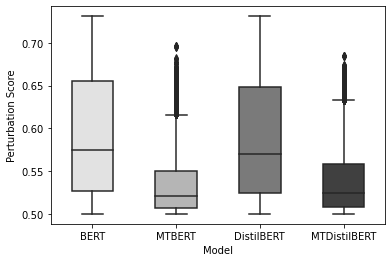

In [29]:
import seaborn as sns
temp_df=df_result_sel[(df_result_sel.result_type=='Successful')].sort_values('model', key= lambda x: x.map(custom_dict))
ax = sns.boxplot(data=temp_df, x='model',y='perturbed_score',  palette='Greys',width=0.5)
ax.set(xlabel='Model', ylabel='Perturbation Score')
fig=ax.get_figure()
fig.savefig(img_loc+"PertScoreDist.png",transparent=True,dpi=400)


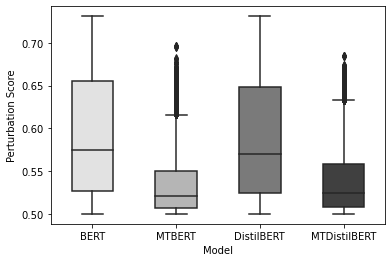

In [30]:
temp_df=df_result_sel[(df_result_sel.result_type=='Successful')].sort_values('model', key= lambda x: x.map(custom_dict))
ax = sns.boxplot(data=temp_df, x='model',y='perturbed_score',  palette='Greys',width=0.5)
ax.set(xlabel='Model', ylabel='Perturbation Score')
fig=ax.get_figure()
fig.savefig(img_loc+"PertScoreDist.png",transparent=True,dpi=400)

In [31]:
# import plotly.express as px
# df = px.data.tips()
# fig = px.box(df_result_sel[(df_result_sel.result_type=='Successful')].sort_values('model', key= lambda x: x.map(custom_dict)), 
#              x='model',y=['perturbed_score'],
#              labels={'model': 'Models'},
#             color_discrete_map=)
# fig.write_image(img_loc+"PertScoreDist.png")
# fig.show()

# fig= px.histogram(df_result_sel[(df_result_sel.result_type=='Successful')].sort_values('model', key= lambda x: x.map(custom_dict))\
#     ,x=['perturbed_score'],
#     color='model',
#     barmode='group',
#     log_y=True,
#     facet_col='attack_recipe',
#     facet_col_wrap=1,
#     width=1400,
#     height=700,
#     facet_row='model')
#     # title='Distribution of Perturation score of successfull attacks of models in different attack recipe')
# fig.write_image(img_loc+"PertScoreDist.png")
# fig.show()


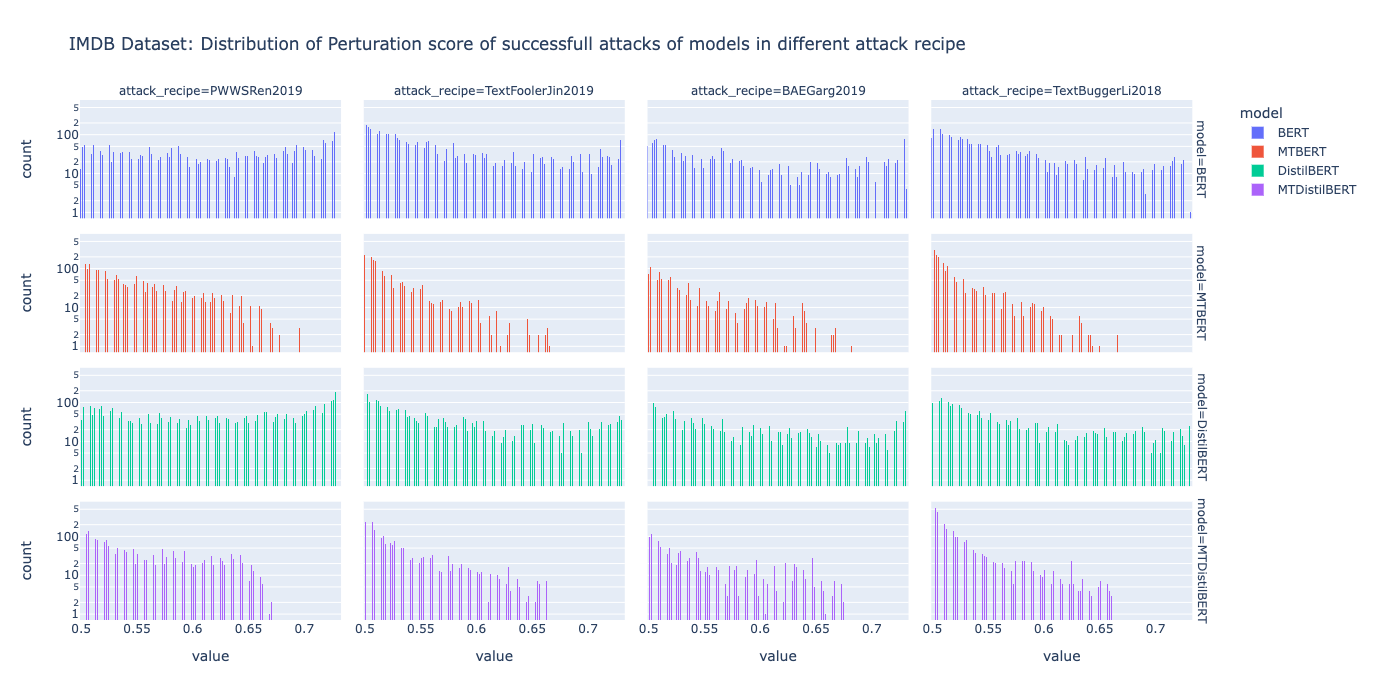

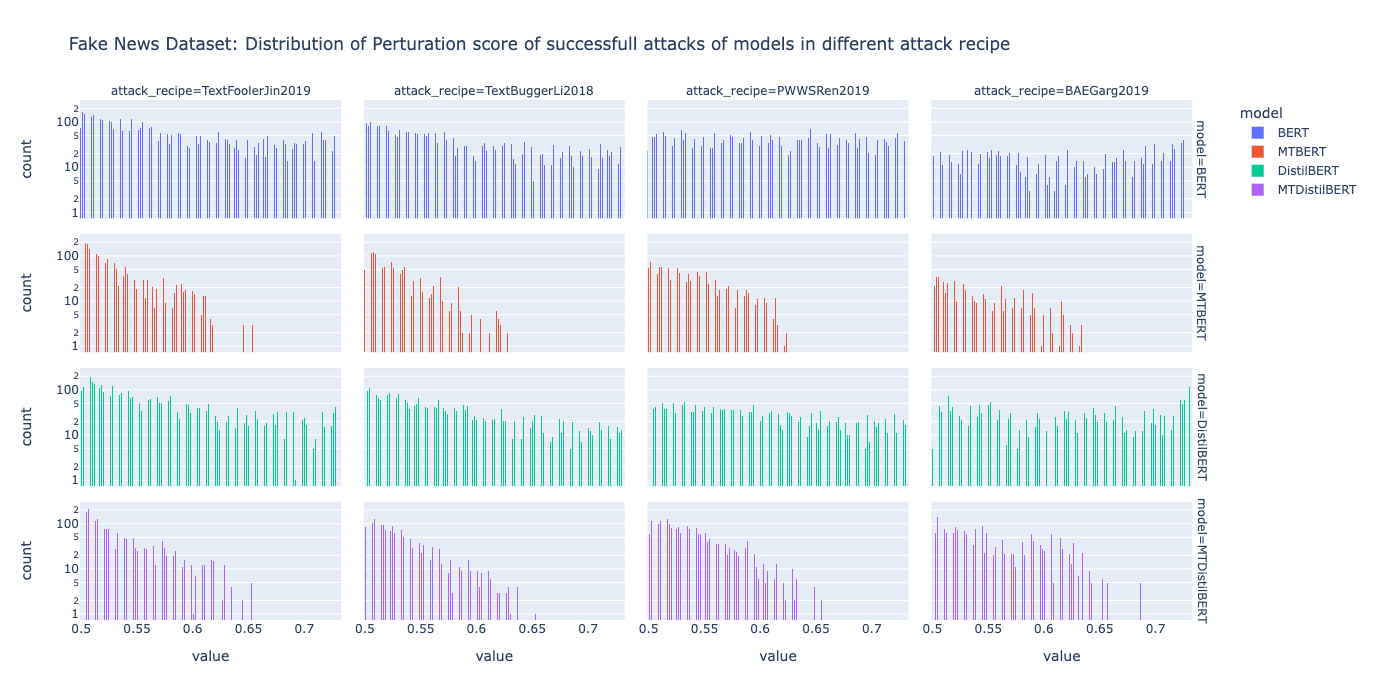

In [32]:
#IMDB Dataset
fig= px.histogram(df_result_imdb_sel[(df_result_imdb_sel.result_type=='Successful')].sort_values('model', key= lambda x: x.map(custom_dict))\
    ,x=['perturbed_score'],
    color='model',
    barmode='group',
    log_y=True,
    facet_col='attack_recipe',
    facet_col_wrap=1,
    width=1400,
    height=700,
    facet_row='model', 
    title='IMDB Dataset: Distribution of Perturation score of successfull attacks of models in different attack recipe')
fig.write_image(img_loc+"PertScoreDist_IMDB.png")
fig.show()

# Fake news dataset
# considering only successfull attempts

fig= px.histogram(df_result_fakenews[(df_result_fakenews.result_type=='Successful')].sort_values('model', key= lambda x: x.map(custom_dict))\
    ,x=['perturbed_score'],
    color='model',
    barmode='group',
    log_y=True,
    facet_col='attack_recipe',
    facet_col_wrap=1,
    width=1400,
    height=700,
    facet_row='model', 
    title='Fake News Dataset: Distribution of Perturation score of successfull attacks of models in different attack recipe')
fig.write_image(img_loc+"PertScoreDist_fakenews.png")
fig.show()

## Exploration of Distribution of Number of Queries


### Conclusion:
1. __For MT BERT model, the number of queries has range of 24-2127, 15-708 and Mean number of queries 401 and 137 for IMDB and Fake news dataset respectively. 75 % of the data is under 596 and 179 respectively. On the other hand, for BERT model, 24-1772, 15-885 for for IMDB and Fake news Dataset with mean value 340 and 160 respectively. And, 75 % of the data is under 466 and 215 respectively.__

2. __TextFooler has shown some relation between number of queries and lenght of the text and same has been mentioned in their paper. Followed by PWWS.__

> MT BERT is require much higher number of queries to attack if the dataset length is higher. 

In [33]:
# considering only successfull attempts
print('****For IMDB dataset, BERT model')
display(df_result_imdb_sel[(df_result_imdb_sel.result_type=='Successful')&(df_result_imdb_sel.model=='BERT') ].num_queries.describe())
print('For IMDB dataset, MTBERT model')
display(df_result_imdb_sel[(df_result_imdb_sel.result_type=='Successful')&(df_result_imdb_sel.model=='MTBERT') ].num_queries.describe())

print('****For Fake News dataset, BERT model')
display(df_result_fakenews[(df_result_fakenews.result_type=='Successful')&(df_result_fakenews.model=='BERT') ].num_queries.describe())
print('For Fake News dataset, MTBERT model')
display(df_result_fakenews[(df_result_fakenews.result_type=='Successful')&(df_result_fakenews.model=='MTBERT') ].num_queries.describe())

****For IMDB dataset, BERT model


count   16,101.00
mean       361.27
std        282.52
min         24.00
25%        161.00
50%        232.00
75%        507.00
max      1,841.00
Name: num_queries, dtype: float64

For IMDB dataset, MTBERT model


count   10,316.00
mean       434.36
std        334.49
min         24.00
25%        165.00
50%        297.00
75%        674.00
max      2,207.00
Name: num_queries, dtype: float64

****For Fake News dataset, BERT model


count   16,963.00
mean       158.33
std        114.54
min         10.00
25%         73.00
50%        127.00
75%        212.00
max        885.00
Name: num_queries, dtype: float64

For Fake News dataset, MTBERT model


count   7,168.00
mean      134.11
std       113.57
min        13.00
25%        56.00
50%        97.00
75%       175.00
max       762.00
Name: num_queries, dtype: float64

In [34]:
df_result_imdb_sel.groupby(['Dataset','model'])['num_queries'].describe()

count   mean    std  min    25%    50%    75%  \
Dataset model                                                            
IMDB    BERT         19,000.00 335.61 281.48 1.00 150.00 222.00 454.00   
        DistilBERT   20,000.00 377.81 312.28 1.00 151.00 242.00 598.00   
        MTBERT       18,000.00 528.15 453.05 1.00 173.00 382.50 799.00   
        MTDistilBERT 20,000.00 482.01 424.06 1.00 159.00 327.00 760.25   

                          max  
Dataset model                  
IMDB    BERT         1,841.00  
        DistilBERT   1,894.00  
        MTBERT       2,345.00  
        MTDistilBERT 2,358.00

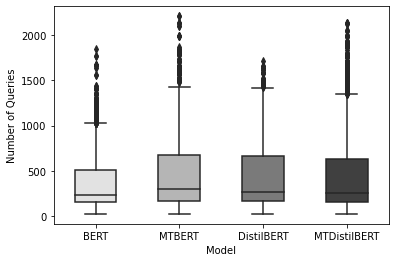

In [35]:
temp_df=df_result_imdb_sel[(df_result_imdb_sel.result_type=='Successful')].sort_values('model', key= lambda x: x.map(custom_dict))
ax = sns.boxplot(data=temp_df, x='model',y='num_queries',  palette='Greys',width=0.5)
ax.set(xlabel='Model', ylabel='Number of Queries')
fig=ax.get_figure()
fig.savefig(img_loc+"NumQueriesDist_IMDB.png",transparent=True,dpi=400)

In [36]:
# IMDB dataset
# fig= px.histogram(df_result_imdb_sel[(df_result_imdb_sel.result_type=='Successful')].sort_values(['model','attack_recipe'], key= lambda x: x.map(custom_dict))\
#     ,x=['num_queries'],
#     color='model',
#     barmode='group',
#     log_y=True,
#     width=1400,
#     height=700,
#     facet_col='attack_recipe',
#     facet_col_wrap=2, 
#     facet_row='model',
#     title='IMDB Dataset: Distribution of number of queries required for successfull attack on models by different attack recipes.')
# fig.write_image(img_loc+"NumQueriesDist_IMDB.png")
# fig.show()

# # Fake news Dataset
# fig= px.histogram(df_result_fakenews[(df_result_fakenews.result_type=='Successful')].sort_values(['model','attack_recipe'], key= lambda x: x.map(custom_dict))\
#     ,x=['num_queries'],
#     color='model',
#     barmode='group',
#     log_y=True,
#     width=1400,
#     height=700,
#     facet_col='attack_recipe',
#     facet_col_wrap=2, 
#     facet_row='model',
#     title='Fake News Dataset; Distribution of number of queries required for successfull attack on models by different attack recipes.')
# fig.write_image(img_loc+"NumQueriesDist_fknews.png")
# fig.show()


## Is attack recipes and models are specific to particular class ?

### Conclusion:
__For IMDB Dataset, the MT BERT model has shown more robustness for class 0. Even, training and testing  However, same behaviour is not observed in FakeNews Dataset.__

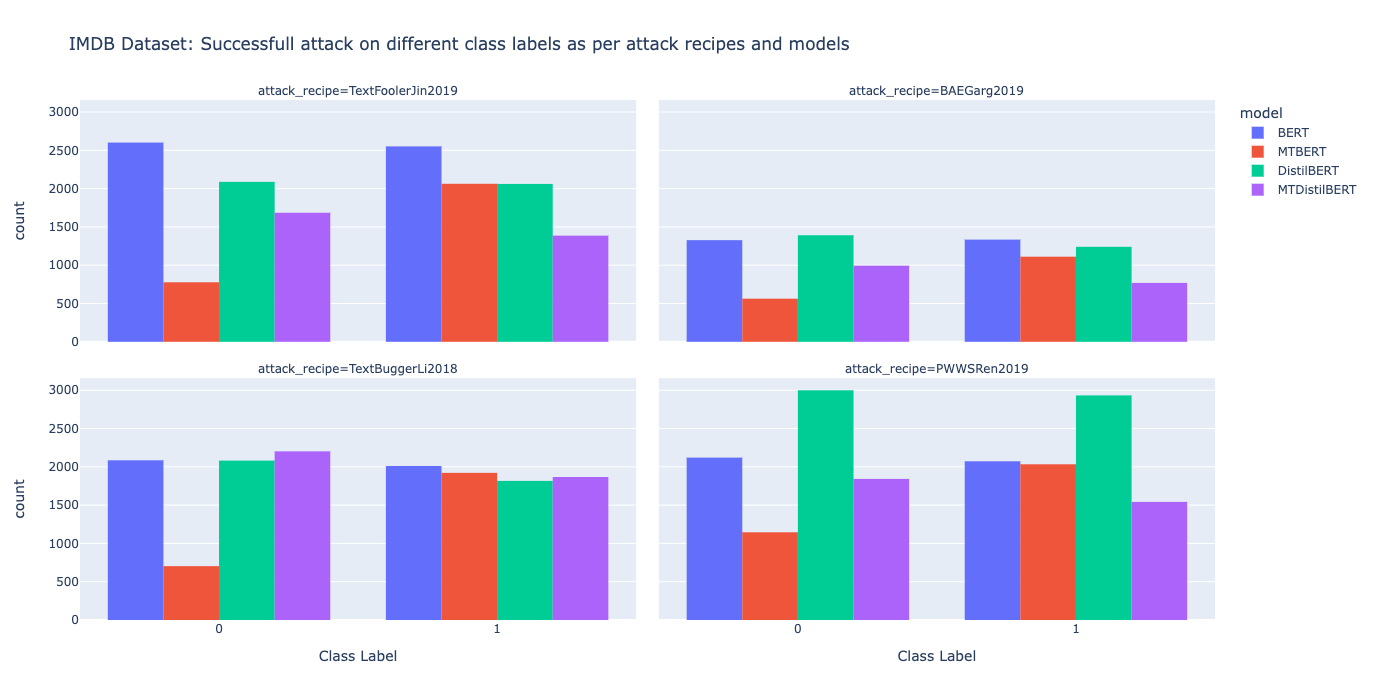

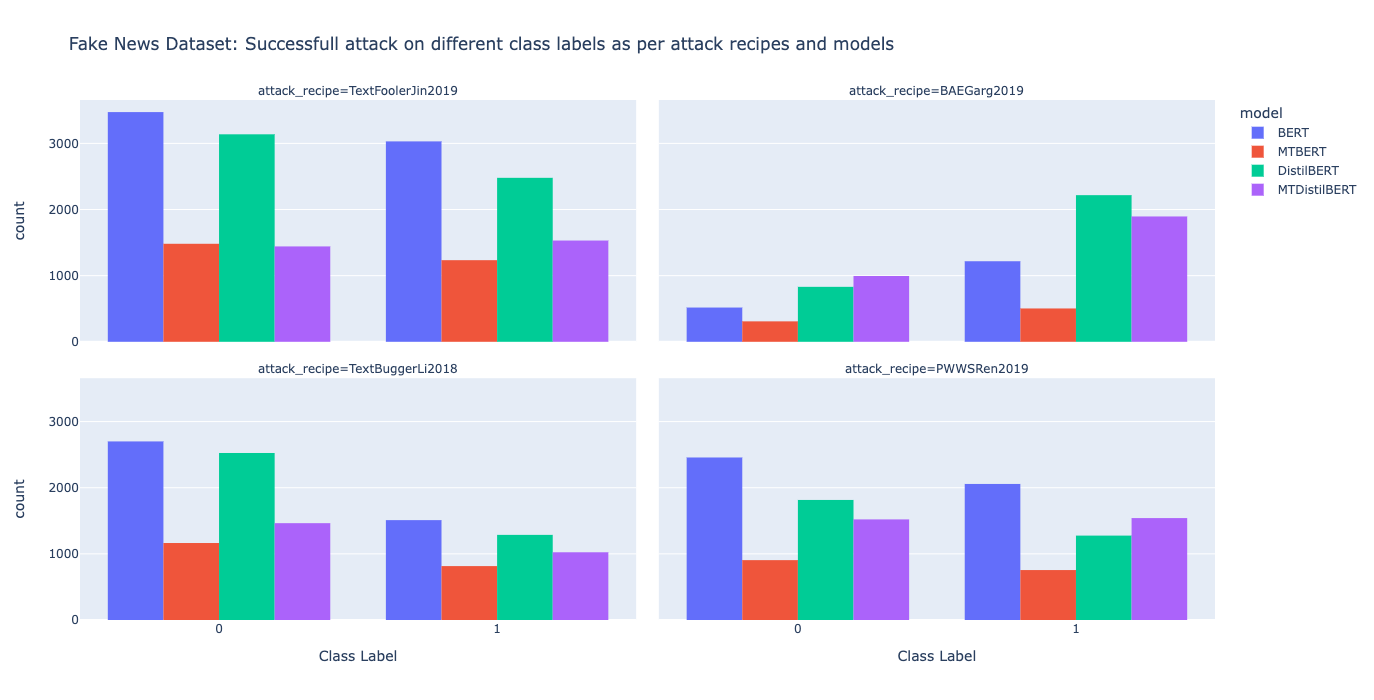

In [37]:
# Is attack recipes are specific to a particular class in a particular model.
fig= px.histogram(df_result_imdb_sel[(df_result_imdb_sel.result_type=='Successful')].sort_values(['model','attack_recipe'], key= lambda x: x.map(custom_dict))\
    ,x=['ground_truth_output'],
    color='model',
    barmode='group',
    width=1000,
    height=700,
    facet_col='attack_recipe',
    facet_col_wrap=2,
    title='IMDB Dataset: Successfull attack on different class labels as per attack recipes and models',
    labels={'value': 'Class Label','ground_truth_output': 'Number of Successful attack'})
fig.show()
fig= px.histogram(df_result_fakenews[(df_result_fakenews.result_type=='Successful')].sort_values(['model','attack_recipe'], key= lambda x: x.map(custom_dict))\
    ,x=['ground_truth_output'],
    color='model',
    barmode='group',
    width=1000,
    height=700,
    facet_col='attack_recipe',
    facet_col_wrap=2,
    title='Fake News Dataset: Successfull attack on different class labels as per attack recipes and models',
    labels={'value': 'Class Label','ground_truth_output': 'Number of Successful attack'})
fig.show()

# Final Important points of Conclusion:
1. __Proposed Model has outperformed their respective models. Overall, MT Bert Model has shown better original accuracy as well as accuracy under attack.__
2. __Overall proposed model has shown robustness towards all attack recipes as compared to their respective baseline models. MT BERT has shown highest robustness in all mentioned models__

In [38]:
# Data Augmentation for the report 

syn_df=pd.read_csv('')

FileNotFoundError: [Errno 2] No such file or directory: ''